# Class balancing study

## Common Parameters

Training data has 25331 samples.


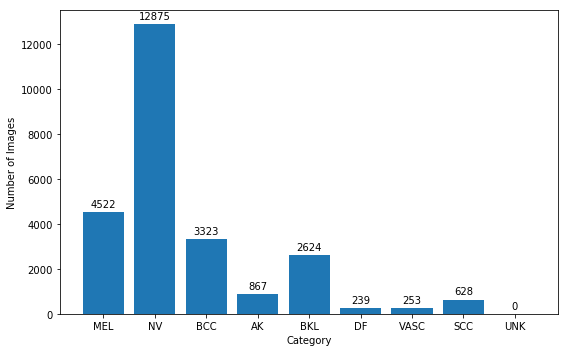

In [2]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data_loader import *
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = "../data/isic2019/"
model_folder = 'models_proper'
history_folder = 'history_proper'
pred_result_folder_test = 'test_predict_results_proper'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

models_info = read_models_info(history_folder, pred_result_folder_test)

# How to handle SVG fonts
plt.rcParams['svg.fonttype'] = 'none'

# class_balanced_21000_model = filter_models_info(
#     models_info, 
#     models=["DenseNet201"],
#     parameters={
#         "balanced": 1,
#         "feepochs": 2, 
#         "ftepochs": 100, 
#         "felr": 0.001,
#         "ftlr": 0.0001,
#         "batch": 16,
#         "lambda": None,
#         "dropout": None,
#         "dggroup": "11",
#         "samples": 20264
#     },
# )[0]

# class_unbalanced_21000_model = filter_models_info(
#     models_info, 
#     models=["DenseNet201"],
#     parameters={
#         "balanced": 0,
#         "feepochs": 2, 
#         "ftepochs": 100, 
#         "felr": 0.001,
#         "ftlr": 0.0001,
#         "batch": 16,
#         "lambda": None,
#         "dropout": None,
#         "samples": 20264
#     },
# )[0]

all_category_names, count_per_category, df_ground_truth = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(data_folder+"",test=True)
# total_sample_count = sum(count_per_category.values())
# print("Test data has {} samples.".format(total_sample_count))

# plot_class_dist(all_category_names, count_per_category).tight_layout()
# plt.show()

# DenseNet201:
* Feature extract epochs: 6.
* Start learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

## Data Augmentation Methods:
* Random Rotations.
* Random Flips
* Random Shears
* Random Brightness variations
* Random Saturation variations

## Impact of the number of samples on validation accuracy (balanced datasets)

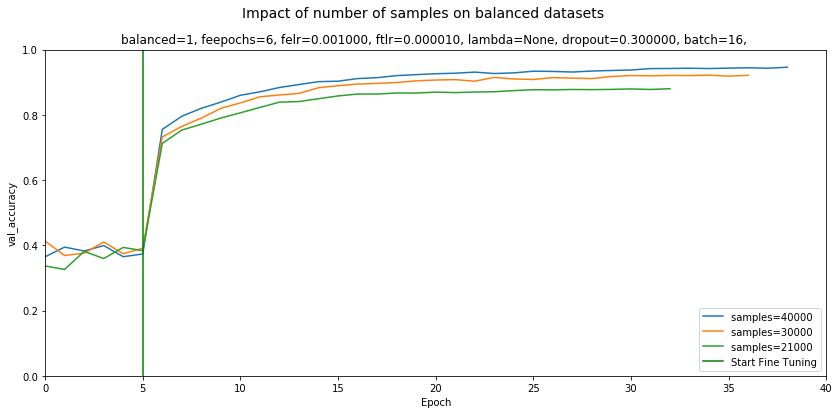

In [58]:
fig = plot_hyperparameter_comparisson_metric(
    [class_balanced_40000_model]+[class_balanced_30000_model]+[class_balanced_21000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["samples"],
    constant_parameters={
        "balanced": 1,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Impact of number of samples on balanced datasets",
    feature_extract_epochs=6,
    epoch_max=40
)

## Compute test metrics for baseline (no oversampling or undersampling)

In [30]:
# Load predicted results
file_path = os.path.join(
    baseline_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))

# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

NameError: name 'baseline_model' is not defined

# Balanced vs not balanced with offline DG (20264 training +val samples)

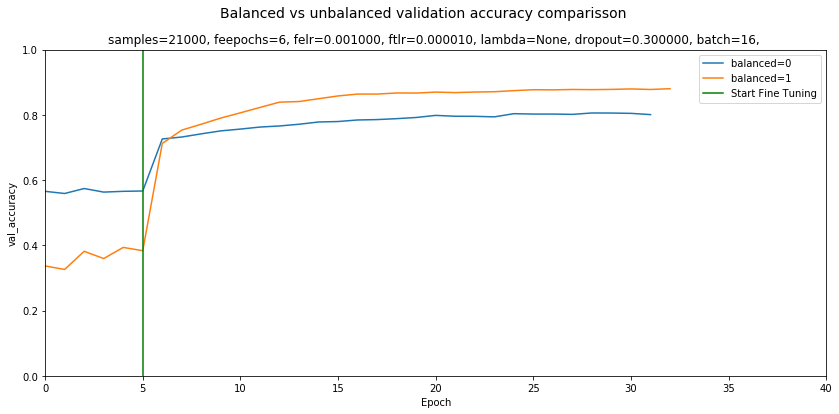

In [32]:
fig = plot_hyperparameter_comparisson_metric(
    [class_unbalanced_20264_model]+[class_balanced_20264_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["balanced"],
    constant_parameters={
        "samples": 21000,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Balanced vs unbalanced validation accuracy comparisson",
    feature_extract_epochs=6,
    epoch_max=40
)

## Compute test metrics for class unbalanced dataset (21000 training samples)

Training data has 20997 samples.


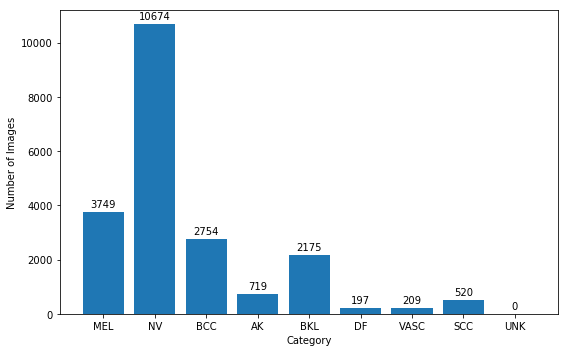

Test data has 5067 samples.


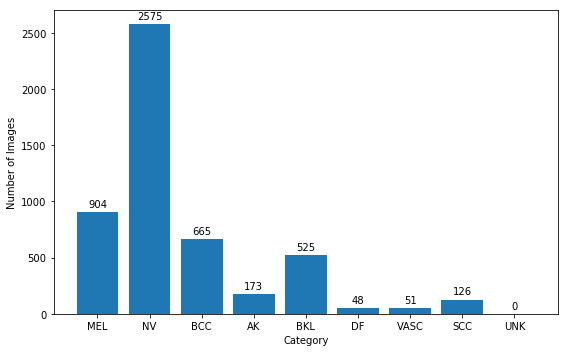

accuracy:  0.762589928057554
balanced_accuracy_score:  0.666018208421153
macro recall_score:  0.666018208421153


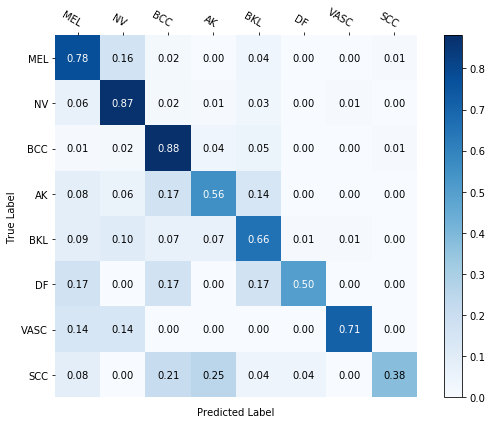

In [87]:
all_category_names, count_per_category = get_count_per_category(class_unbalanced_21000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category = get_count_per_category(class_unbalanced_21000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_unbalanced_21000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Compute test metrics for class balanced dataset (21000 training samples)

Training data has 21000 samples.


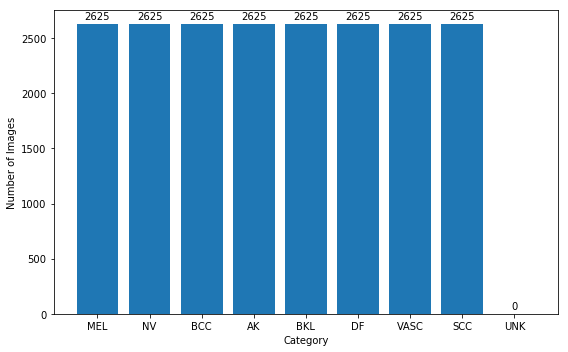

Test data has 5067 samples.


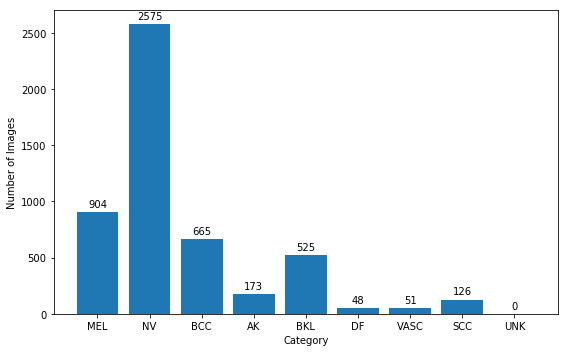

accuracy:  0.7519242155121374
balanced_accuracy_score:  0.7447264955391679
macro recall_score:  0.7447264955391679


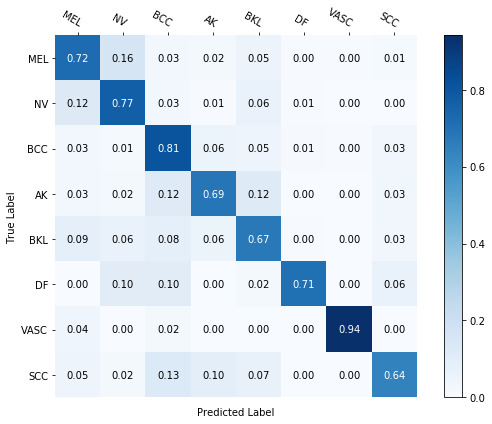

In [8]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_21000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_21000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_21000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Test metrics for class unbalanced dataset 

Training data has 29997 samples.


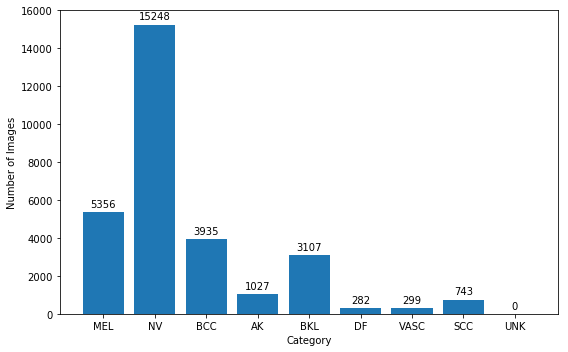

Test data has 5067 samples.


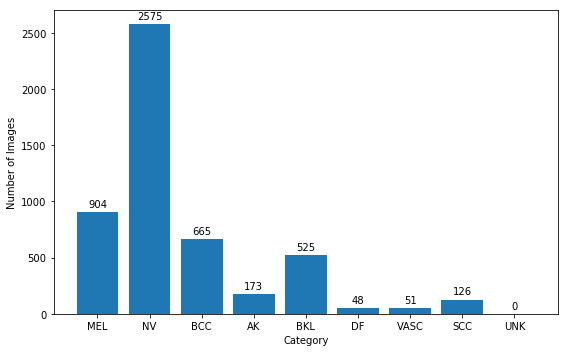

accuracy:  0.8221827511347938
balanced_accuracy_score:  0.6993335103540623
macro recall_score:  0.6993335103540623


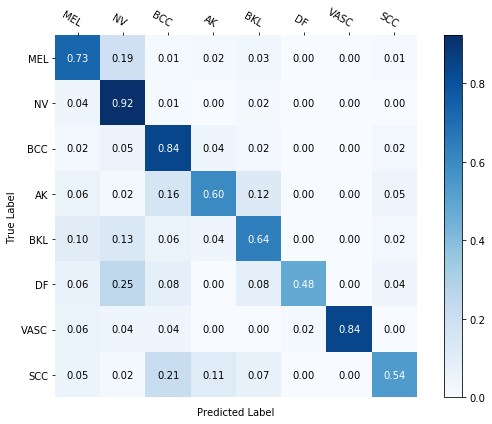

In [6]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_unbalanced_30000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_unbalanced_30000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_unbalanced_30000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Test metrics for class balanced dataset 

Training data has 30000 samples.


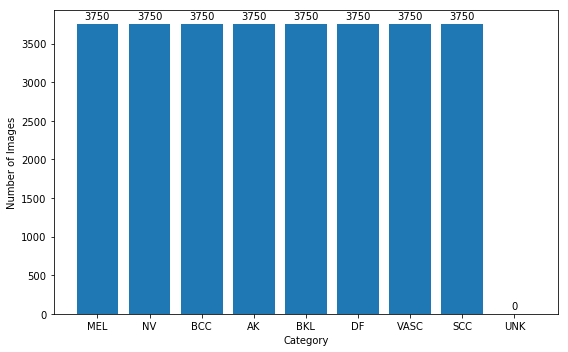

Test data has 5067 samples.


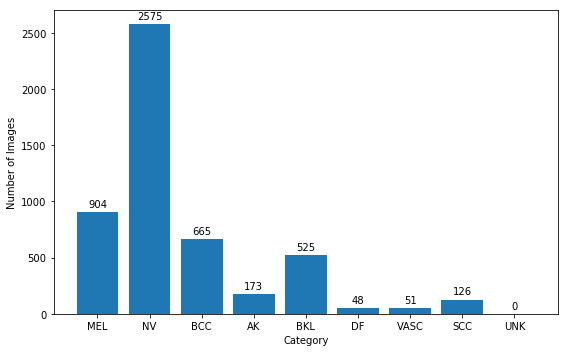

accuracy:  0.7795539767120584
balanced_accuracy_score:  0.7655637363246468
macro recall_score:  0.7655637363246468


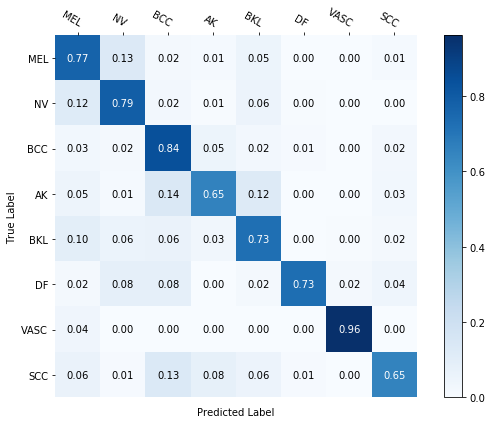

In [5]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_30000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_30000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_30000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# Samples impact on validation performance 

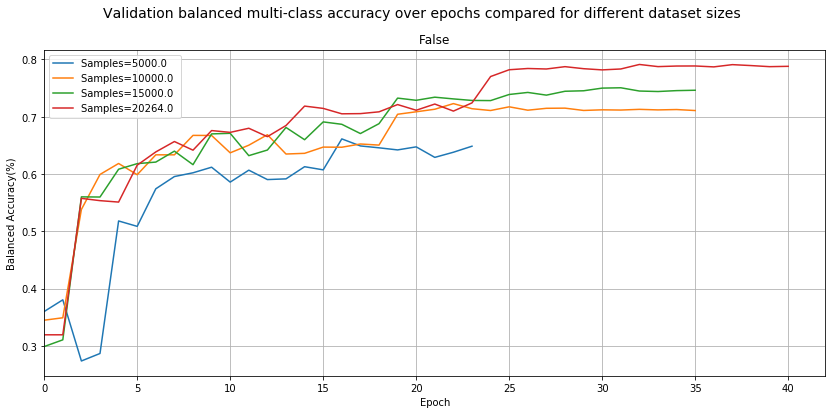

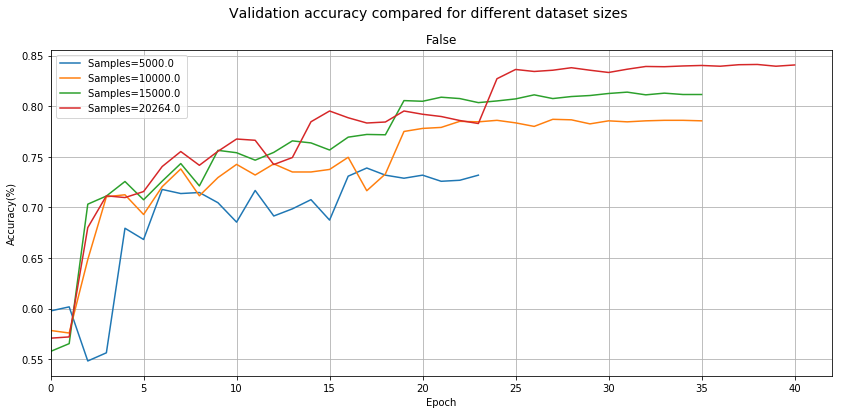

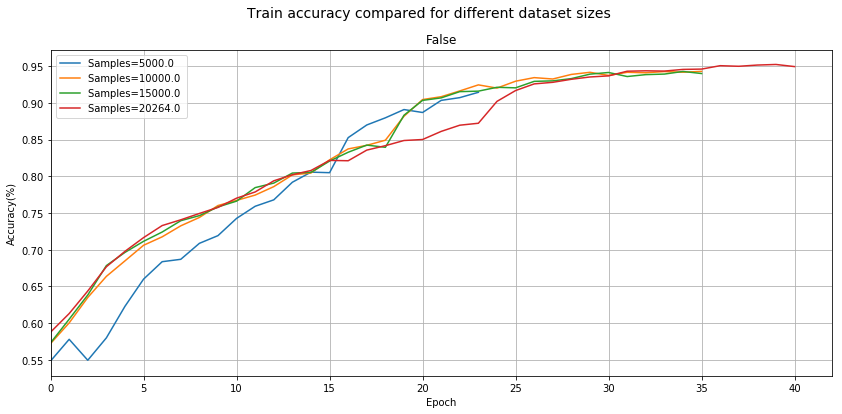

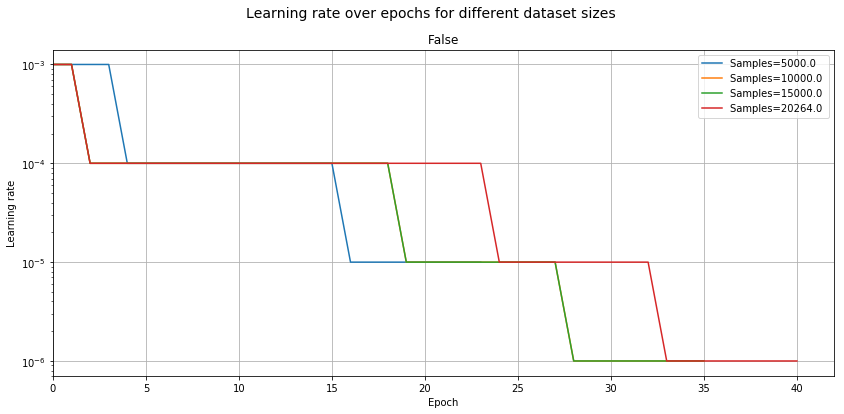

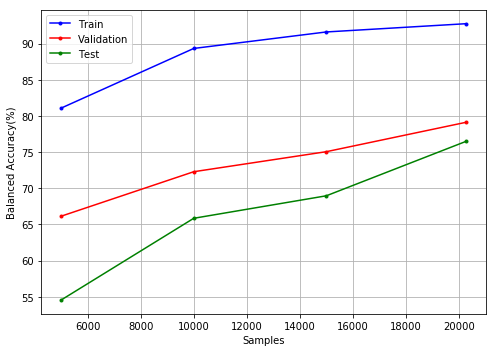

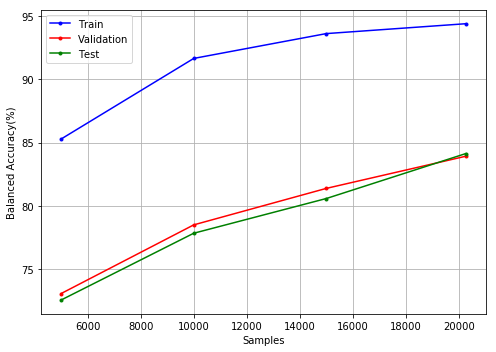

In [79]:
constant_params={
    "balanced": 0,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "ftepochs": 100,
    "batch": 16,
    "dggroup": "11"
}

fig1 = plot_hyperparameter_over_epochs(
    models_info,
    "val_balanced_accuracy",
    "BMA(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    feature_extract_epochs=None,
)

fig2 = plot_hyperparameter_over_epochs(
    models_info,
    "val_accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    feature_extract_epochs=None,
)


fig3 = plot_hyperparameter_over_epochs(
    models_info,
    "accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Train accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig4 = plot_hyperparameter_over_epochs(
    models_info,
    "lr",
    "Learning rate",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    feature_extract_epochs=None,
    y_scale="log"
)

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric="balanced_accuracy",
    val_metric="val_balanced_accuracy",
    test_metric=balanced_accuracy_score,
    df_ground_truth=df_ground_truth
)

fig6 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric="accuracy",
    val_metric="val_accuracy",
    test_metric=accuracy_score,
    df_ground_truth=df_ground_truth
)

# fig1.savefig(os.path.join("densenet201_samples_bma_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
# fig4.savefig(os.path.join("densenet201_samples_lr_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
# fig5.savefig(os.path.join("densenet201_samples_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

[{'model': 'DenseNet201', 'hyperparameters': {'balanced': '0', 'samples': '20264', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '16', 'dggroup': '11'}, 'log': '../history/DenseNet201/balanced_0-samples_20264-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_16-dggroup_11/0/training.csv', 'pred_test_0': '../test_predict_results/DenseNet201/balanced_0-samples_20264-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_16-dggroup_11/0', 'pred_test': '../test_predict_results/DenseNet201/balanced_0-samples_20264-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_16-dggroup_11'}, {'model': 'DenseNet201', 'hyperparameters': {'balanced': '0', 'samples': '10000', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '16', 'dggroup': '11'}, 'log': '../history/D

KeyError: 'b'

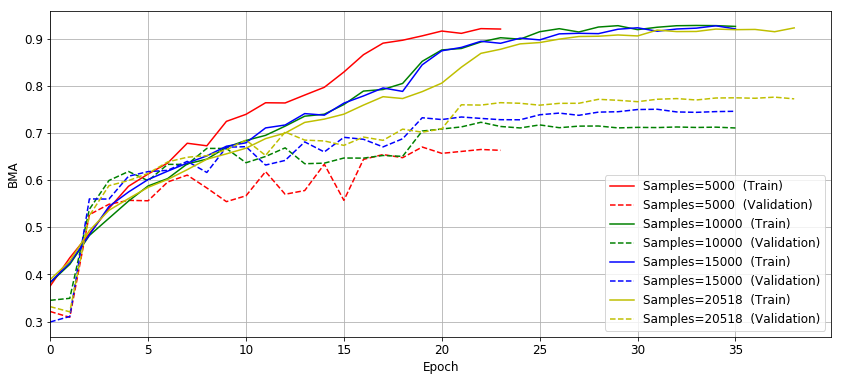

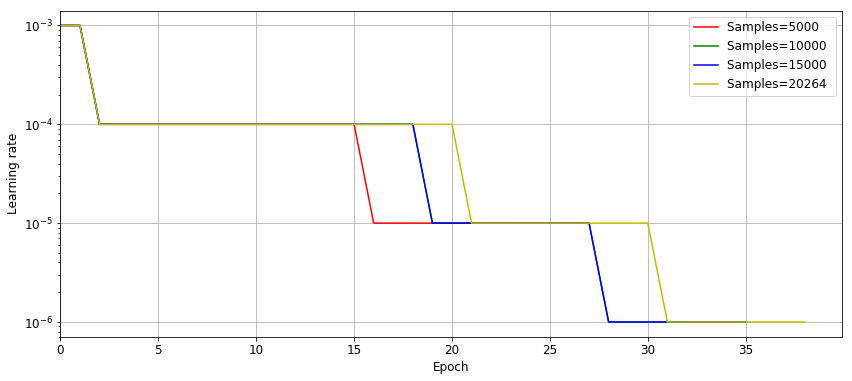

In [55]:
constant_params={
    "samples": [5000, 10000, 15000, 20264],
    "balanced": 0,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "ftepochs": 100,
    "batch": 16,
    "dggroup": "11"
}

import matplotlib
font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

fig1 = plot_hyperparameter_over_epochs(
    models_info,
    "balanced_accuracy",
    "BMA",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    feature_extract_epochs=None,
)


# fig3 = plot_hyperparameter_over_epochs(
#     models_info,
#     "accuracy",
#     "Accuracy",
#     hyperparameter_compared="samples",
#     hyperparameter_compared_label="Samples",
#     constant_parameters=constant_params,
#     feature_extract_epochs=None,
# )

fig4 = plot_lr_over_epochs(
    models_info,
    "lr",
    "Learning rate",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    y_scale="log"
)
fig1.savefig(os.path.join("densenet201_samples_bma_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig4.savefig(os.path.join("densenet201_samples_lr_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric="balanced_accuracy",
    val_metric="val_balanced_accuracy"
)


fig6 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    test_metric=[]
)

fig1.savefig(os.path.join("densenet201_samples_bma_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig4.savefig(os.path.join("densenet201_samples_lr_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
# fig5.savefig(os.path.join("densenet201_samples_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

In [58]:
fig2 = plot_model_comparisson_balanced_acc(
    models_info, 
    df_ground_truth,
    models=["DenseNet121", "DenseNet169", "DenseNet201"],
    constant_parameters= {
        "balanced": "0",
        "samples": "20512",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16,
        "dggroup": "11"
    },
    figsize = (18,8)
)

[]


ValueError: not enough values to unpack (expected 4, got 0)

## Balance influence study 

[{'model': 'DenseNet121', 'hyperparameters': {'balanced': '0', 'samples': '20517', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '01'}, 'log': '../history_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01/0/training.csv', 'pred_test_0': '../test_predict_results_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01/0', 'pred_test': '../test_predict_results_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01'}, {'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '20512', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'},

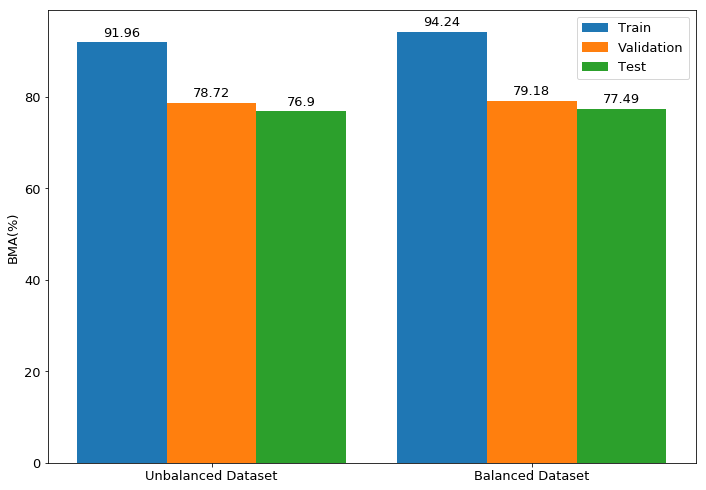

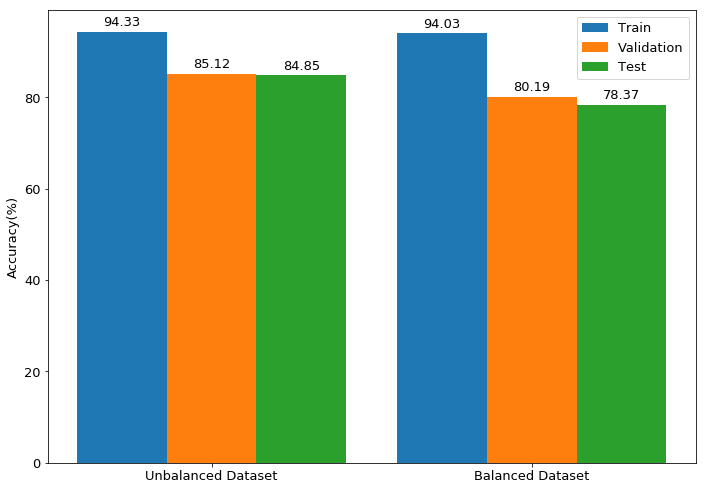

In [20]:
constant_params={
    "samples": [20517, 20512],
    "dropout": None, 
    "lambda": None,
    "ftepochs": 100,
    "feepochs": 2,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "batch": 32,
    "dggroup": ["01", "11"]
}

# fig1 = plot_hyperparameter_over_epochs(
#     models_info,
#     "val_balanced_accuracy",
#     "Balanced Accuracy(%)",
#     hyperparameter_compared="balanced",
#     hyperparameter_compared_label="Balanced Dataset",
#     constant_parameters=constant_params,
#     title="Validation balanced multi-class accuracy over epochs compared for different dataset sizes",
#     feature_extract_epochs=None,
# )

# fig2 = plot_hyperparameter_over_epochs(
#     models_info,
#     "val_accuracy",
#     "Accuracy(%)",
#     hyperparameter_compared="balanced",
#     hyperparameter_compared_label="Balanced Dataset",
#     constant_parameters=constant_params,
#     title="Validation accuracy compared for different dataset sizes",
#     feature_extract_epochs=None,
# )


# fig3 = plot_hyperparameter_over_epochs(
#     models_info,
#     "accuracy",
#     "Accuracy(%)",
#     hyperparameter_compared="balanced",
#     hyperparameter_compared_label="Balanced Dataset",
#     constant_parameters=constant_params,
#     title="Train accuracy compared for different dataset sizes",
#     feature_extract_epochs=None,
# )

# fig4 = plot_hyperparameter_over_epochs(
#     models_info,
#     "lr",
#     "Learning rate",
#     hyperparameter_compared="balanced",
#     hyperparameter_compared_label="Balanced Dataset",
#     constant_parameters=constant_params,
#     title="Learning rate over epochs for different dataset sizes",
#     feature_extract_epochs=None,
#     y_scale="log"
# )
import matplotlib
font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)
print(filter_models_info(
        models_info, 
        models=["DenseNet121"],
        parameters=constant_params
    ))
def label_func(labels):
    return ["Unbalanced Dataset" if label==0.0 else "Balanced Dataset" for label in labels]

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet121"],
        parameters=constant_params
    ),
    "balanced",
    train_metric=["balanced_accuracy"],
    val_metric=["val_balanced_accuracy"],
    test_metric=[balanced_accuracy_score],
    df_ground_truth=df_ground_truth,
    bar_plot=True,
    figsize=(10,7),
    xticklabelfunction=label_func,
    metric_label="BMA(%)"
)

fig6 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet121"],
        parameters=constant_params
    ),
    "balanced",
    train_metric=["accuracy"],
    val_metric=["val_accuracy"],
    test_metric=[accuracy_score],
    df_ground_truth=df_ground_truth,
    bar_plot=True,
    figsize=(10,7),
    xticklabelfunction=label_func,
    metric_label="Accuracy(%)"
)

# fig1.savefig(os.path.join("densenet201_balanced_bma_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig5.savefig(os.path.join("densenet201_bma_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig6.savefig(os.path.join("densenet201_acc_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

[{'model': 'DenseNet121', 'hyperparameters': {'balanced': '0', 'samples': '20517', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '01'}, 'log': '../history_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01/0/training.csv', 'pred_test_0': '../test_predict_results_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01/0', 'pred_test': '../test_predict_results_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01'}, {'model': 'DenseNet201', 'hyperparameters': {'balanced': '0', 'samples': '20517', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '01'},

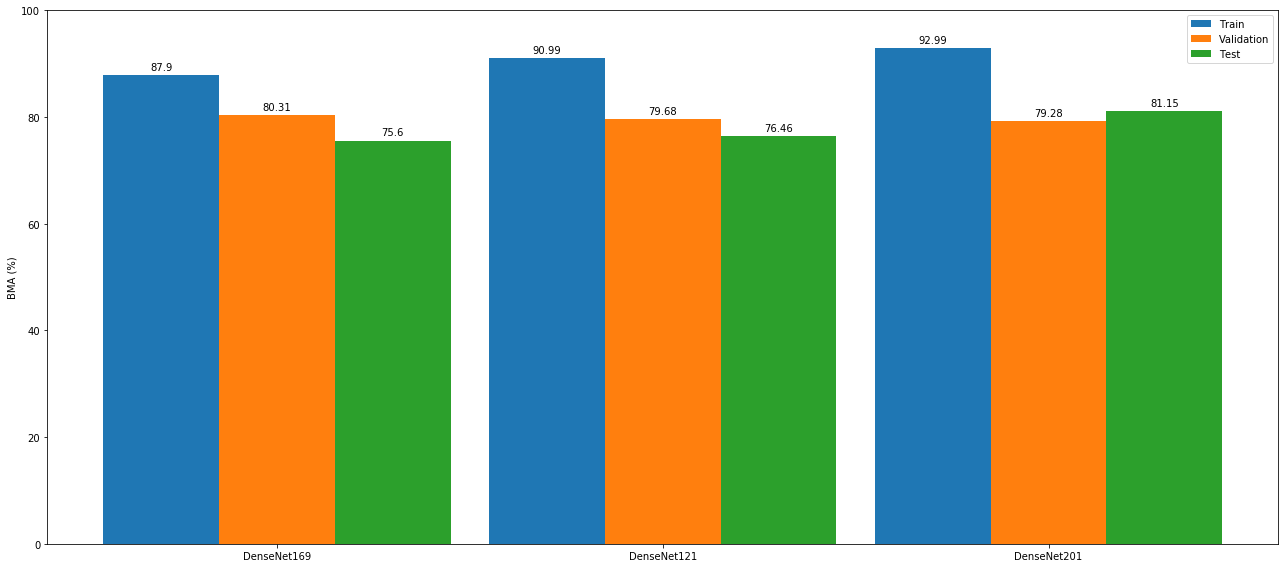

In [61]:

import matplotlib 

font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

fig2 = plot_model_comparisson_balanced_acc(
    models_info, 
    df_ground_truth,
    models=["DenseNet121", "DenseNet169", "DenseNet201"],
    constant_parameters= {
        "balanced": "0",
        "samples": "20517",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 32,
        "dggroup": "01"
    },
    figsize = (18,8)
)

## Class balanced study

[20264.0, 82400.0, 70000.0, 60000.0, 50000.0, 40000.0, 30000.0]
[87.98, 98.33, 97.85, 97.34, 96.39, 95.25, 92.45]
[87.9, 98.31, 97.89, 97.22, 96.32, 95.36, 92.38]
[96.08, 93.17, 92.88, 92.3, 91.27, 91.09, 90.3]
[95.88, 92.91, 92.63, 92.09, 91.06, 90.79, 89.9]
[77.76, 81.53, 81.01, 79.72, 79.78, 81.21, 79.46]
[76.87, 86.7, 85.06, 83.19, 82.59, 82.55, 79.48]
(20264.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 82400.0)
(96.08, 90.3, 91.09, 91.27, 92.3, 92.88, 93.17)
(20264.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 82400.0)
(95.88, 89.9, 90.79, 91.06, 92.09, 92.63, 92.91)


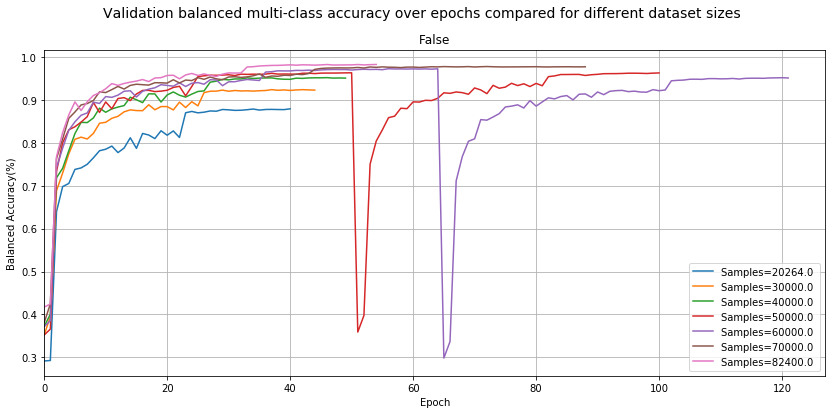

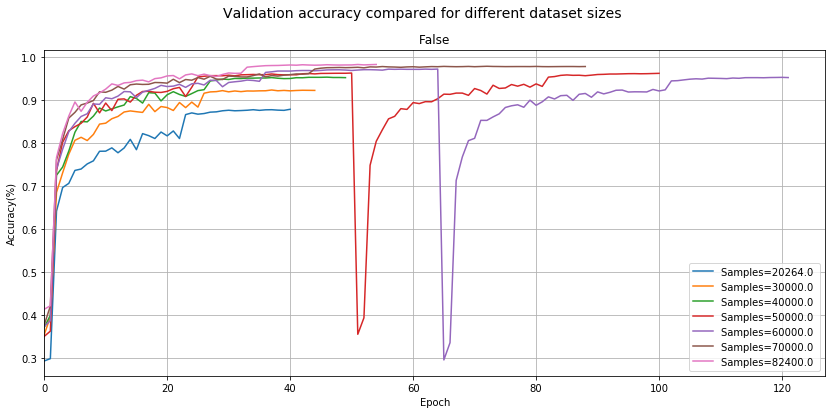

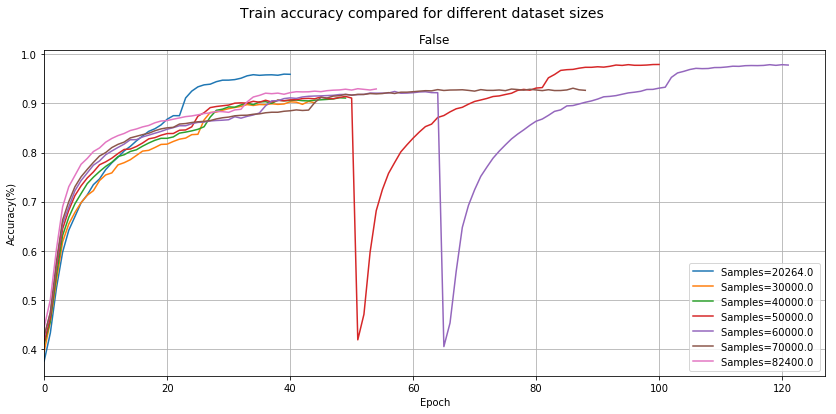

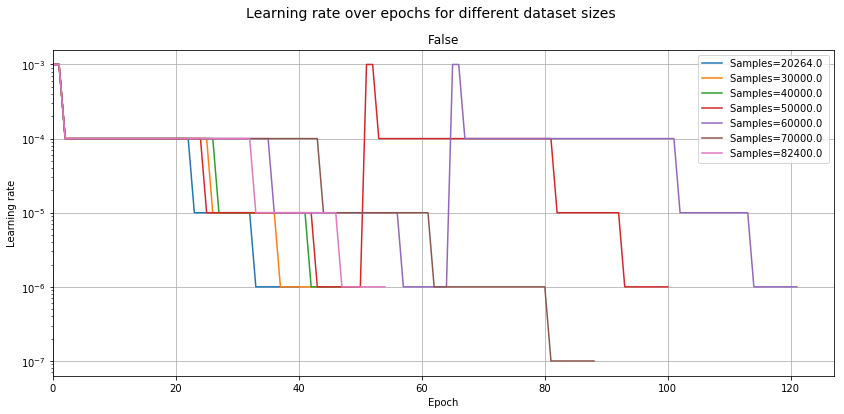

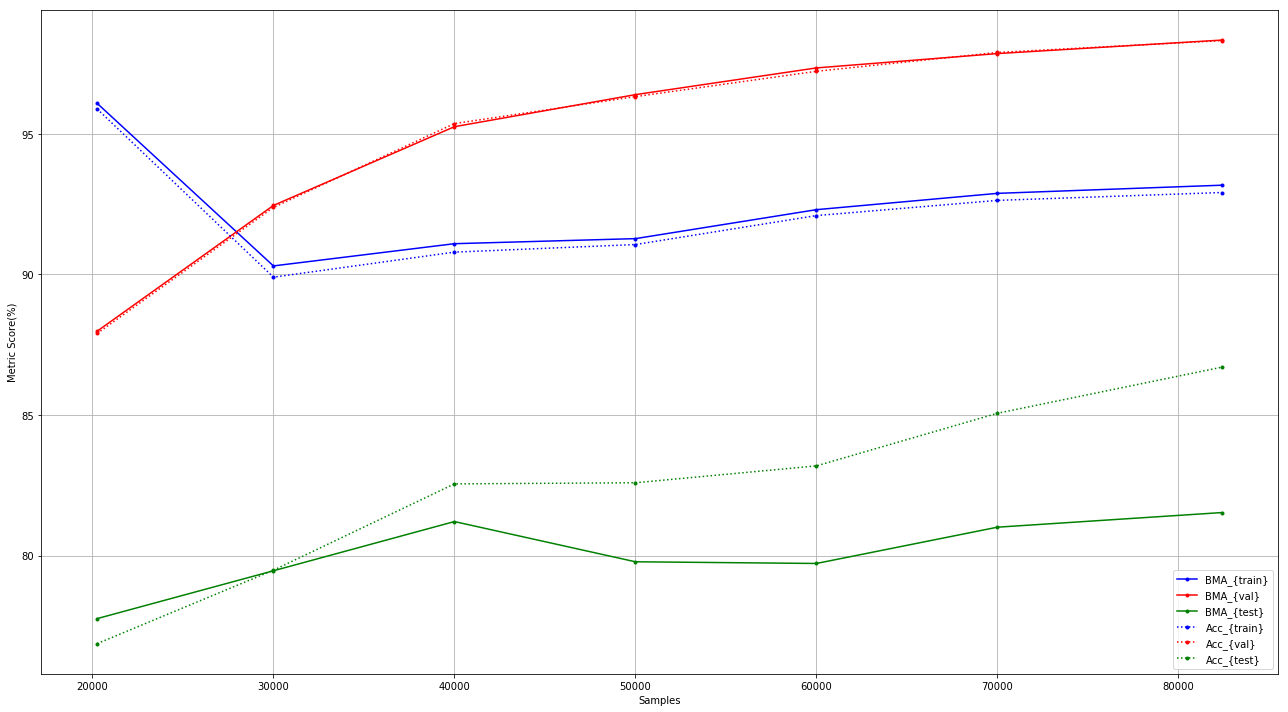

In [25]:
constant_params={
    "balanced": 1,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "ftepochs": 100,
    "batch": 16,
    "dggroup": "11",
    "samples": [10000, 20264, 30000, 40000, 50000, 60000, 70000, 82400]
}

fig1 = plot_hyperparameter_over_epochs(
    models_info,
    "val_balanced_accuracy",
    "Balanced Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Validation balanced multi-class accuracy over epochs compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig2 = plot_hyperparameter_over_epochs(
    models_info,
    "val_accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Validation accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)


fig3 = plot_hyperparameter_over_epochs(
    models_info,
    "accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Train accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig4 = plot_hyperparameter_over_epochs(
    models_info,
    "lr",
    "Learning rate",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Learning rate over epochs for different dataset sizes",
    feature_extract_epochs=None,
    y_scale="log"
)

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric=["balanced_accuracy", "accuracy"],
    train_label=["BMA_{train}", "Acc_{train}"],
    val_metric=["val_balanced_accuracy", "val_accuracy"],
    val_label=["BMA_{val}", "Acc_{val}"],
    test_metric=[balanced_accuracy_score, accuracy_score],
    test_label=["BMA_{test}", "Acc_{test}"],
    metric_label="Metric Score(%)",
    df_ground_truth=df_ground_truth,
    figsize=(18,10)
)


fig5.savefig(os.path.join("densenet201_balanced_samples_metrics_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

[{'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '49996', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'}, 'log': '../history2/DenseNet121/balanced_1-samples_49996-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11/0/training.csv', 'pred_test_0': None, 'pred_test': '../test_predict_results2/DenseNet121/balanced_1-samples_49996-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11'}, {'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '29996', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'}, 'log': '../history2/DenseNet121/balanced_1-samples_29996-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11/0/training.csv', 'pre

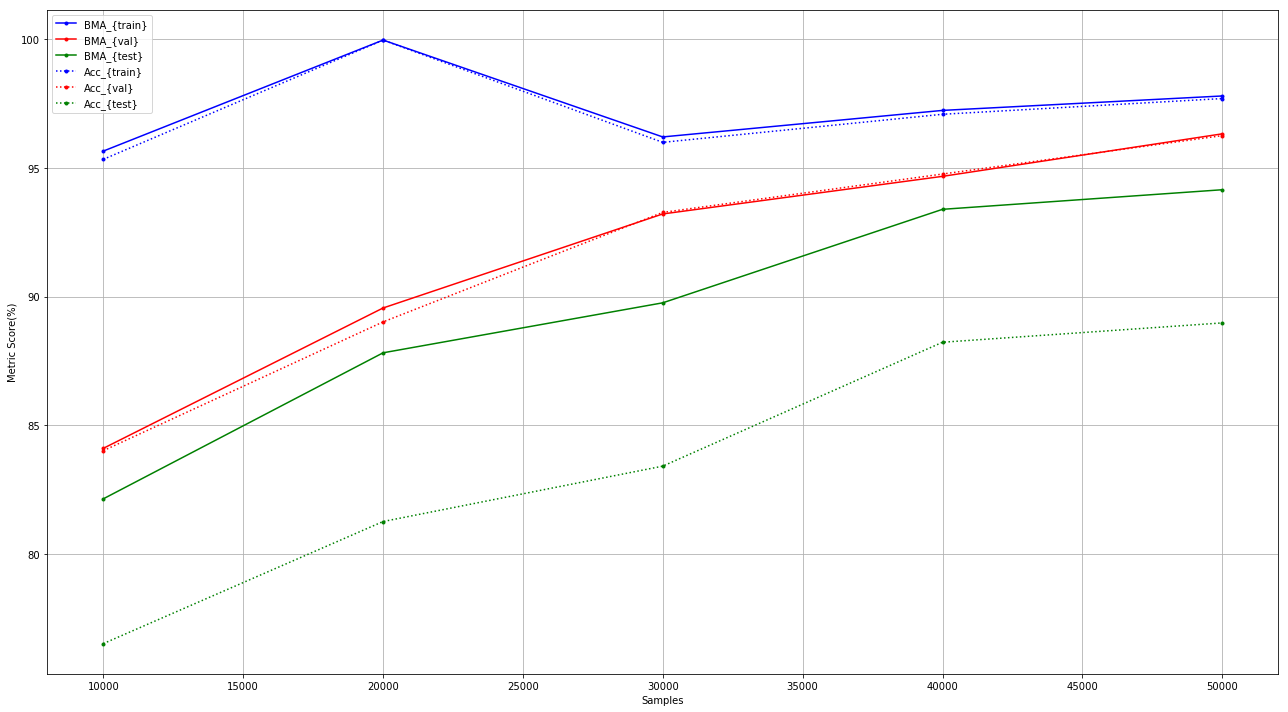

In [7]:
history_folder = 'history2'
pred_result_folder_test = 'test_predict_results2'

models_info = read_models_info(history_folder, pred_result_folder_test)
print(models_info)
constant_params={
    "balanced": 1,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "ftepochs": 100,
    "batch": 32,
    "dggroup": "11",
     "samples": [9996, 20000, 29996, 40000, 49996]
}

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet121"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric=["balanced_accuracy", "accuracy"],
    train_label=["BMA_{train}", "Acc_{train}"],
    val_metric=["val_balanced_accuracy", "val_accuracy"],
    val_label=["BMA_{val}", "Acc_{val}"],
    test_metric=[balanced_accuracy_score, accuracy_score],
    test_label=["BMA_{test}", "Acc_{test}"],
    metric_label="Metric Score(%)",
    df_ground_truth=df_ground_truth,
    figsize=(18,10)
)


[{'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '83424', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'}, 'log': '../history_proper/DenseNet121/balanced_1-samples_83424-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11/0/training.csv', 'pred_test_0': '../test_predict_results_proper/DenseNet121/balanced_1-samples_83424-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11/0', 'pred_test': '../test_predict_results_proper/DenseNet121/balanced_1-samples_83424-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11'}, {'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '70000', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'},

/home/fmts/miniconda3/envs/experiments/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


[83424.0, 70000.0, 60000.0, 50000.0, 30000.0, 10000.0]
[84.93, 83.25, 83.04, 81.71, 82.89, 74.32]
[86.66, 86.0, 86.44, 83.49, 82.09, 71.13]
[97.49, 96.34, 96.27, 95.71, 96.61, 92.43]
[97.35, 96.15, 96.09, 95.49, 96.33, 91.92]
[81.91, 82.39, 81.49, 80.95, 80.13, 75.43]
[86.39, 85.99, 85.04, 83.46, 82.24, 70.96]
(10000.0, 30000.0, 50000.0, 60000.0, 70000.0, 83424.0)
(92.43, 96.61, 95.71, 96.27, 96.34, 97.49)
(10000.0, 30000.0, 50000.0, 60000.0, 70000.0, 83424.0)
(91.92, 96.33, 95.49, 96.09, 96.15, 97.35)


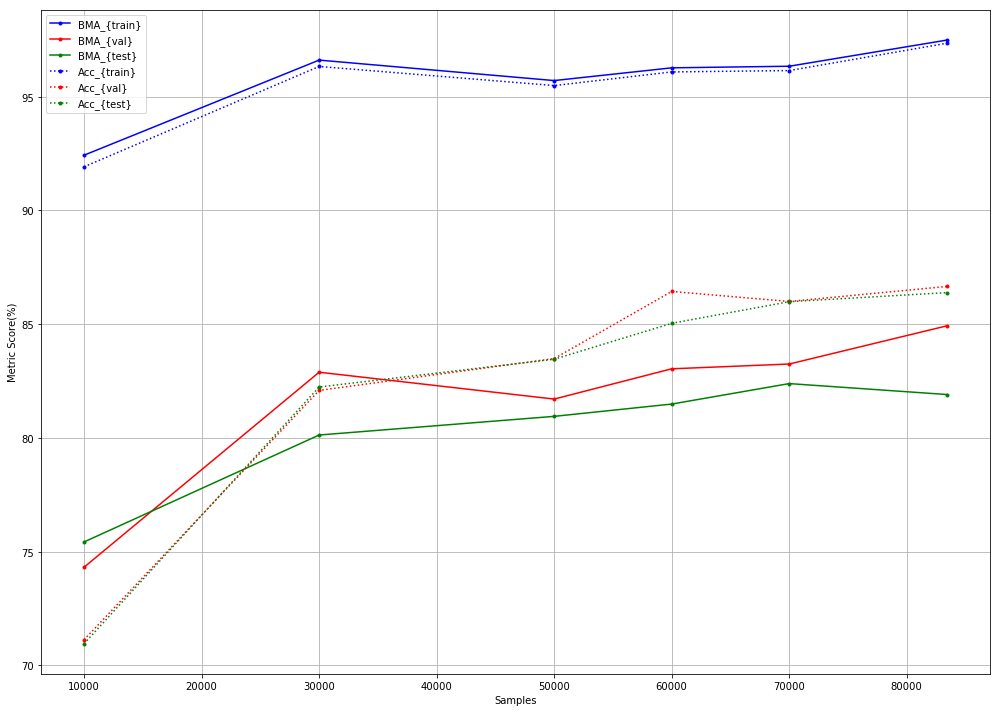

In [7]:
history_folder = 'history_proper'
pred_result_folder_test = 'test_predict_results_proper'

models_info = read_models_info(history_folder, pred_result_folder_test)
constant_params={
    "balanced": 1,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "ftepochs": 100,
    "batch": 32,
    "dggroup": "11",
    "samples": [10000, 20517, 30000, 50000, 60000, 70000, 83424]
}
print(filter_models_info(
        models_info, 
        parameters=constant_params
    ))

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet121"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric=["balanced_accuracy", "accuracy"],
    train_label=["BMA_{train}", "Acc_{train}"],
    val_metric=["val_balanced_accuracy", "val_accuracy"],
    val_label=["BMA_{val}", "Acc_{val}"],
    test_metric=[balanced_accuracy_score, accuracy_score],
    test_label=["BMA_{test}", "Acc_{test}"],
    metric_label="Metric Score(%)",
    df_ground_truth=df_ground_truth,
    figsize=(7,5)
)

fig5.savefig(os.path.join("densenet201_balanced_samples_metrics_comp_proper.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)


[{'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '83424', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'}, 'log': '../history_proper/DenseNet121/balanced_1-samples_83424-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11/0/training.csv', 'pred_test_0': '../test_predict_results_proper/DenseNet121/balanced_1-samples_83424-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11/0', 'pred_test': '../test_predict_results_proper/DenseNet121/balanced_1-samples_83424-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_11'}, {'model': 'DenseNet121', 'hyperparameters': {'balanced': '1', 'samples': '70000', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '11'},

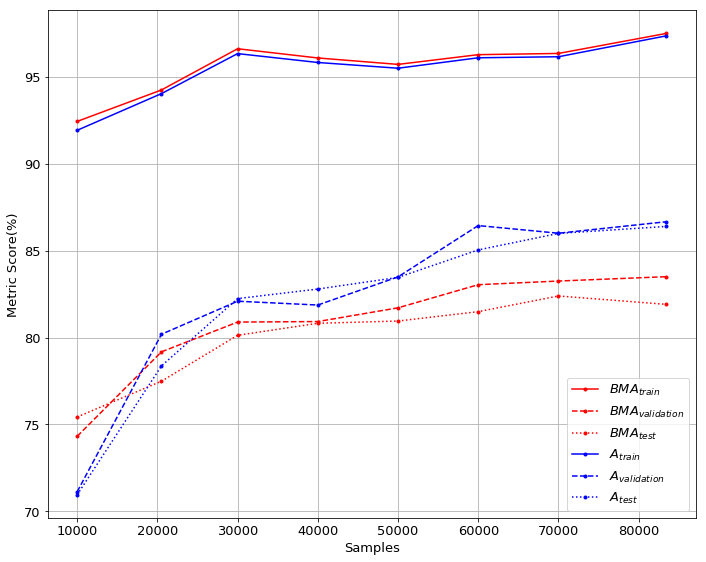

In [35]:
history_folder = 'history_proper'
pred_result_folder_test = 'test_predict_results_proper'

import matplotlib 

font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

models_info = read_models_info(history_folder, pred_result_folder_test)
constant_params={
    "balanced": 1,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "ftepochs": 100,
    "batch": 32,
    "dggroup": "11",
    "samples": [10000, 20512, 30000, 40000, 50000, 60000, 70000, 83424]
}
print(filter_models_info(
        models_info, 
        parameters=constant_params
    ))

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet121"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric=["balanced_accuracy", "accuracy"],
    train_label=["$BMA_{train}$", "$A_{train}$"],
    val_metric=["val_balanced_accuracy", "val_accuracy"],
    val_label=["$BMA_{validation}$", "$A_{validation}$"],
    test_metric=[balanced_accuracy_score, accuracy_score],
    test_label=["$BMA_{test}$", "$A_{test}$"],
    metric_label="Metric Score(%)",
    df_ground_truth=df_ground_truth,
    figsize=(10,8)
)

fig5.savefig(os.path.join("densenet201_balanced_samples_metrics_comp_proper.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)


## Test set results 

Test data has 5067 samples.
'MEL':	904	(17.84%)
'NV':	2575	(50.82%)
'BCC':	665	(13.12%)
'AK':	173	(3.41%)
'BKL':	525	(10.36%)
'DF':	48	(0.95%)
'VASC':	51	(1.01%)
'SCC':	126	(2.49%)
'UNK':	0	(0.00%)


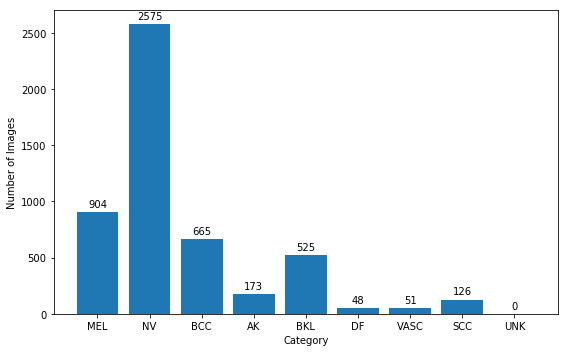

Model selection criteria: best_balanced_acc

Train + validation sampled: 20264
Feature extract epochs: 2
Feature extract learning rate: 0.001000
Fine tuning learning rate: 0.000100
Dropout rate: None
Batch size: 16

Samples: 20264 (unbalanced)
	accuracy:  0.8413262285375962
	balanced_accuracy_score:  0.7647591972662804


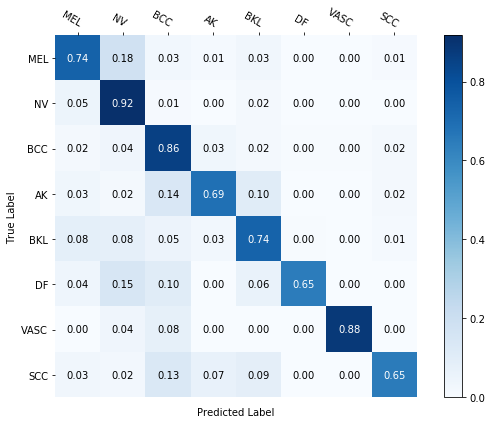

Samples: 20264 (balanced)
	accuracy:  0.7686994276692323
	balanced_accuracy_score:  0.777576578211087


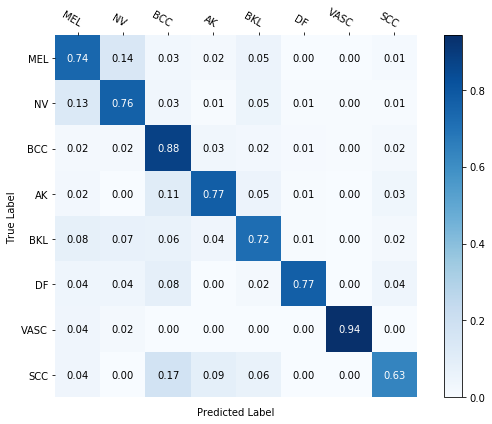

Samples: 82400 (balanced)
	accuracy:  0.8669824353660943
	balanced_accuracy_score:  0.8153432324855604


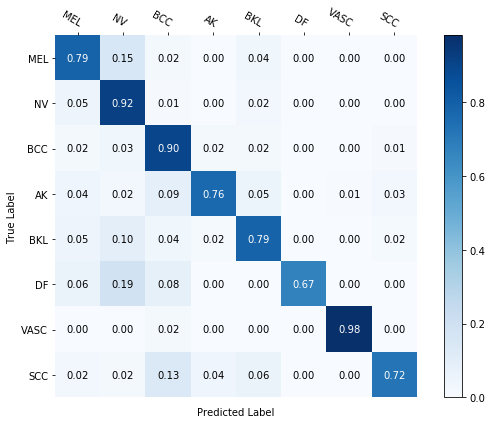

In [84]:
data_folder = "../data/isic2019/sampled_balanced_20264_224_dg_1"

test_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
test_ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth.csv')
df_test_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    test_image_folder, 
    test_ground_truth_file,
    test=True
)

known_category_num = len(known_category_names)
unknown_category_num = 1
all_category_names = known_category_names + [unknown_category_name]
all_category_num = known_category_num + unknown_category_num

count_per_category = Counter(df_test_ground_truth['category'])
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[i], count_per_category[i]*100/total_sample_count))

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
ax.set(xlabel='Category', ylabel='Number of Images')
rects = plt.bar(all_category_names, [count_per_category[i] for i in range(all_category_num)])
autolabel(ax, rects)
fig.tight_layout()
plt.show()

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

# Confusion Matrixes 

# 20264 samples imbalanced
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

print(f'Model selection criteria: {postfix}\n')
print(f"Train + validation sampled: {model_info['hyperparameters']['samples']}")
print(f"Feature extract epochs: {model_info['hyperparameters']['feepochs']}")
print(f"Feature extract learning rate: {model_info['hyperparameters']['felr']}")
print(f"Fine tuning learning rate: {model_info['hyperparameters']['ftlr']}")
print(f"Dropout rate: {model_info['hyperparameters']['dropout']}")
print(f"Batch size: {model_info['hyperparameters']['batch']}")

print("")


# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

print('Samples: 20264 (unbalanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig3 = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 20264 samples balanced
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 20264,
        "balanced": 1,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

print('Samples: 20264 (balanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig2 = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 82400 samples
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 82400,
        "balanced": 1,
        "lambda": None,
        "feepochs": 2, 
        "ftepochs": 100, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None,
        "dggroup": "11"
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

print('Samples: 82400 (balanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

fig.savefig(os.path.join("densenet201_82400_balanced_conf_matrix.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
# fig.savefig(os.path.join("densenet201_82400_balanced_conf_matrix.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

Samples: 20264 (unbalanced)
	accuracy:  0.8500394632991318
	balanced_accuracy_score:  0.7645763328648812


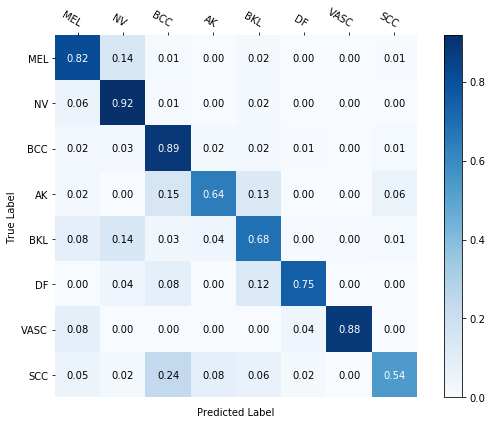

Samples: 82400 (balanced)
	accuracy:  0.8638516179952644
	balanced_accuracy_score:  0.8191191246407846


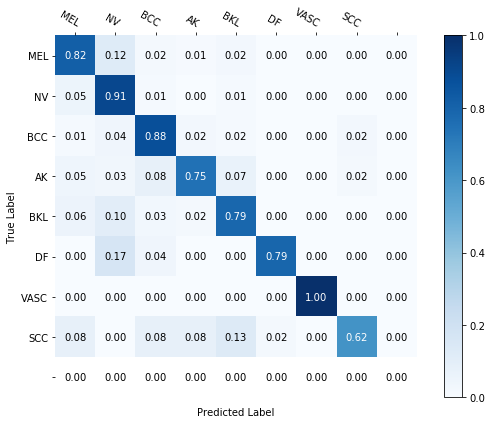

In [24]:
data_folder = "../data/isic2019"
model_folder = 'models'
history_folder = 'history'
pred_result_folder_test = 'test_predict_results'
model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

data_folder = "../data/isic2019/sampled_balanced_20264_224_dg_1"

test_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
test_ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth.csv')
df_test_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    test_image_folder, 
    test_ground_truth_file,
    test=True
)
# Confusion Matrixes 

# 20264 samples imbalanced
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)
print(model_info)
# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']
{
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
print('Samples: 20264 (unbalanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig3 = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# fig3.savefig(os.path.join("densenet201_20517_unbalanced_conf_matrix.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
